In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files=os.listdir("/content/drive/MyDrive/archive (1)/data/with_mask/")
without_mask_files=os.listdir("/content/drive/MyDrive/archive (1)/data/without_mask/")

In [4]:
len(with_mask_files)

3725

In [5]:
len(without_mask_files)

3828

In [6]:
with_mask_label=[1]*len(with_mask_files)
without_mask_label=[0]*len(without_mask_files)
labels=with_mask_label+without_mask_label

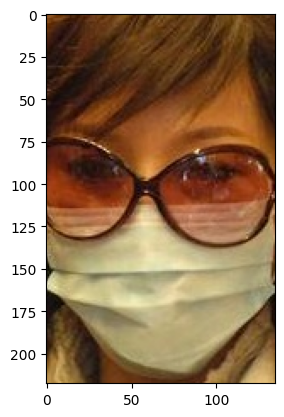

In [7]:
img=mpimg.imread('/content/drive/MyDrive/archive (1)/data/with_mask/with_mask_10.jpg')
plt.imshow(img)

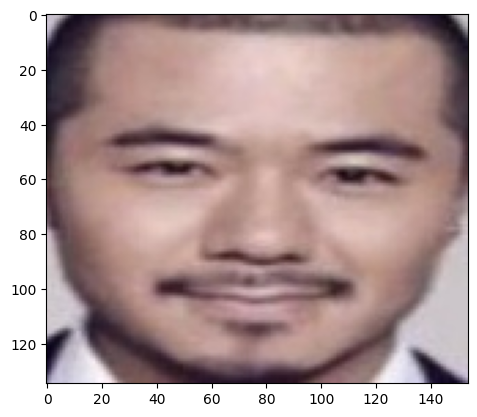

In [8]:
img=mpimg.imread('/content/drive/MyDrive/archive (1)/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

Image processing

In [9]:
with_mask_path="/content/drive/MyDrive/archive (1)/data/with_mask/"
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path="/content/drive/MyDrive/archive (1)/data/without_mask/"
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
len(data)

7553

In [11]:
data[0].shape

(128, 128, 3)

Converting image list and label list to numpy arrays

In [12]:
X=np.array(data)
Y=np.array(labels)

In [13]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train test split

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)


In [15]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

Building cnn model

In [16]:
import tensorflow as tf

from tensorflow import keras

In [17]:

from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential()
num_classes=2
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation="sigmoid"))

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [19]:
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 19s 33ms/step - loss: 2.3441 - acc: 0.7800 - val_loss: 0.7284 - val_acc: 0.7223
Epoch 2/5
170/170 [==============================] - 4s 25ms/step - loss: 0.5999 - acc: 0.8453 - val_loss: 0.3967 - val_acc: 0.8562
Epoch 3/5
170/170 [==============================] - 4s 26ms/step - loss: 0.3350 - acc: 0.8838 - val_loss: 0.2599 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 5s 29ms/step - loss: 0.2737 - acc: 0.9036 - val_loss: 0.2052 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 4s 25ms/step - loss: 0.2213 - acc: 0.9132 - val_loss: 0.2255 - val_acc: 0.9074


Model evaluation

In [20]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy:", accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.2255 - acc: 0.9212
Test Accuracy: 0.921244204044342


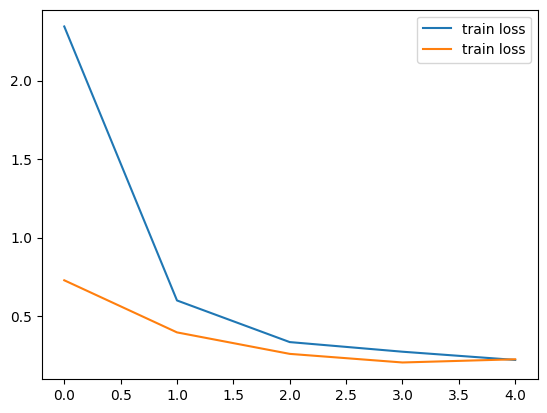

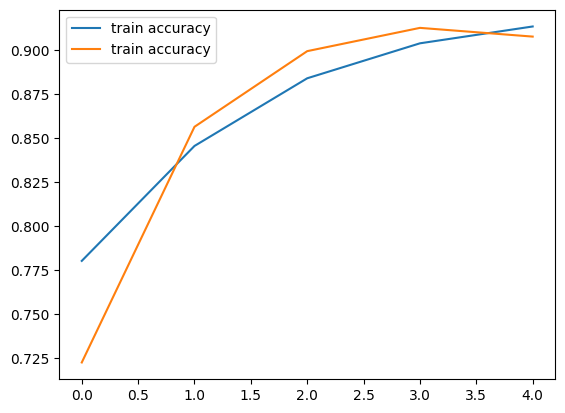

In [21]:
h=history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='train loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='train accuracy')
plt.legend()
plt.show()

Predictive system

In [ ]:
input_image_path=input("Path of image to predict")

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image, (128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,(1,128,128,3))
input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if(input_pred_label==1):
  print("Person in image is waering mask")
else:
  print("No mask detetcted")